# Some utils functions and load data

In [1]:
from svm import *
from utils import *

In [2]:
train = ('data/train_kernel.txt', 'data/train_linear.txt', 'data/train_multi.txt')
test = ('data/test_kernel.txt', 'data/test_linear.txt', 'data/test_multi.txt')

# Show the non-linear classifier

In [3]:
X_train, t_train = load_data_to_fit(train[0])
X_test, t_test = load_data_to_fit(test[0])

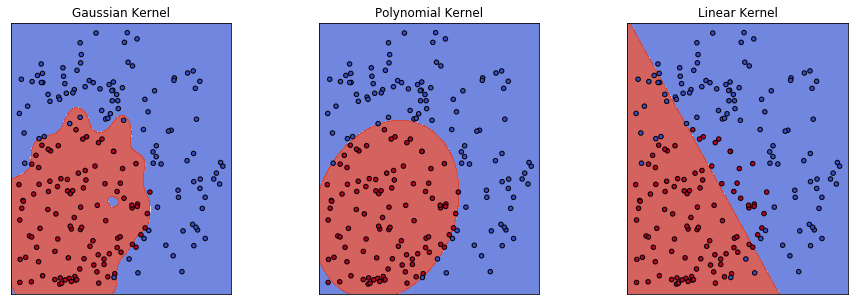

In [4]:
titles = ('Gaussian Kernel', 'Polynomial Kernel', 'Linear Kernel')
models = (SVM(kernel='g'), SVM(kernel='p'), SVM(kernel='l'))
for model in models:
    model.fit(X_train, t_train)
show_models(models, titles, X_test, t_test, 'Kernel.png')

# Show the linear

In [8]:
X_train, t_train = load_data_to_fit(train[1])
X_test, t_test = load_data_to_fit(test[1])

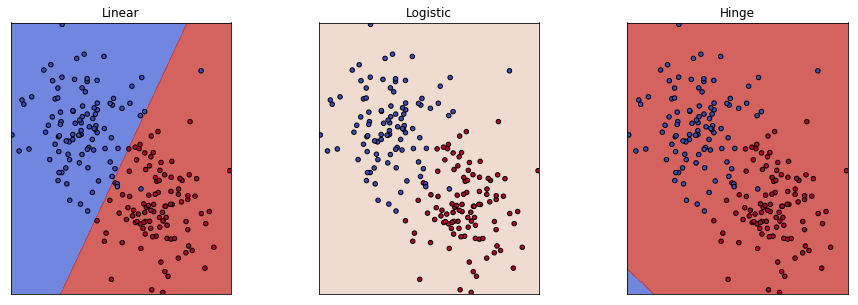

In [10]:
titles = ('Linear', 'Logistic', 'Hinge')
models = (Linear(), Logistic(), SVM(kernel='l', loss='hinge'))
models[0].fit(X_train, t_train, lr=0.0001)
models[1].fit(X_train, t_train, lr=0.001)
models[2].fit(X_train, t_train)
show_models(models, titles, X_test, t_test, 'linear.png')

# Show the multi-classifier

In [11]:
X_train, t_train = load_data_to_fit(train[2])
X_test, t_test = load_data_to_fit(test[2])

In [ ]:
titles = ('Gaussian Kernel', 'Polynomial Kernel', 'Linear Kernel')
models = (
    multiSVM(n_classes=3, kernel='g'), 
    multiSVM(n_classes=3, kernel='p'), 
    multiSVM(n_classes=3, kernel='l')
)
for model in models:
    model.fit(X_train, t_train)
show_models(models, titles, X_test, t_test, 'multi.png')